In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [14]:
df = pd.read_csv('User_data.csv')

In [15]:
df.head()

,Date,Users
0,8/10/2021,1193
1,8/11/2021,1250
2,8/12/2021,1160
3,8/13/2021,817
4,8/14/2021,362


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    417 non-null    object
 1   Users   417 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.6+ KB


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    417 non-null    datetime64[ns]
 1   Users   417 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.6 KB


In [19]:
df

,Date,Users
0,2021-08-10,1193
1,2021-08-11,1250
2,2021-08-12,1160
3,2021-08-13,817
4,2021-08-14,362
...,...,...
412,2022-09-26,1815
413,2022-09-27,1816
414,2022-09-28,1859
415,2022-09-29,1856


In [20]:
ts = df
ts.columns = ['ds','y']
ts.head()

,ds,y
0,2021-08-10,1193
1,2021-08-11,1250
2,2021-08-12,1160
3,2021-08-13,817
4,2021-08-14,362


<Axes: xlabel='ds'>

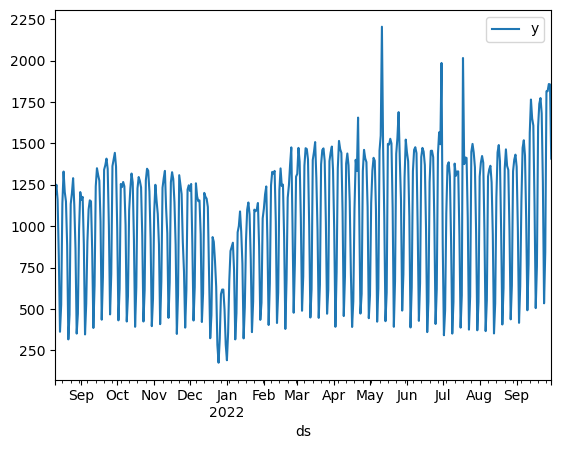

In [21]:
ts.set_index('ds').plot()

In [23]:
model = Prophet().fit(ts)
future = model.make_future_dataframe(60)
forecast = model.predict(future)
forecast.head()

13:33:11 - cmdstanpy - INFO - Chain [1] start processing
13:33:11 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,999.987345,1095.495658,1508.783053,999.987345,999.987345,311.319559,311.319559,311.319559,311.319559,311.319559,311.319559,0.0,0.0,0.0,1311.306904
1,2021-08-11,999.055743,1141.774658,1518.861740,999.055743,999.055743,326.573654,326.573654,326.573654,326.573654,326.573654,326.573654,0.0,0.0,0.0,1325.629398
2,2021-08-12,998.124141,1070.725115,1448.964131,998.124141,998.124141,264.052719,264.052719,264.052719,264.052719,264.052719,264.052719,0.0,0.0,0.0,1262.176860
3,2021-08-13,997.192539,716.745274,1106.511209,997.192539,997.192539,-82.885476,-82.885476,-82.885476,-82.885476,-82.885476,-82.885476,0.0,0.0,0.0,914.307063
4,2021-08-14,996.260937,194.140117,564.562596,996.260937,996.260937,-625.478962,-625.478962,-625.478962,-625.478962,-625.478962,-625.478962,0.0,0.0,0.0,370.781975


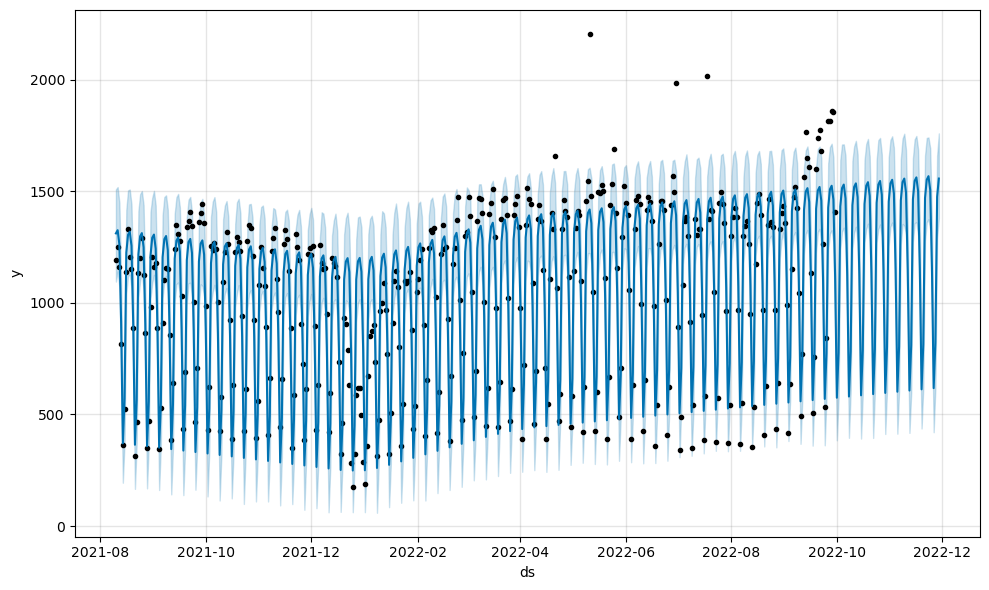

In [25]:
model.plot(forecast);

In [31]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,999.987345,1095.495658,1508.783053,999.987345,999.987345,311.319559,311.319559,311.319559,311.319559,311.319559,311.319559,0.0,0.0,0.0,1311.306904
1,2021-08-11,999.055743,1141.774658,1518.861740,999.055743,999.055743,326.573654,326.573654,326.573654,326.573654,326.573654,326.573654,0.0,0.0,0.0,1325.629398
2,2021-08-12,998.124141,1070.725115,1448.964131,998.124141,998.124141,264.052719,264.052719,264.052719,264.052719,264.052719,264.052719,0.0,0.0,0.0,1262.176860
3,2021-08-13,997.192539,716.745274,1106.511209,997.192539,997.192539,-82.885476,-82.885476,-82.885476,-82.885476,-82.885476,-82.885476,0.0,0.0,0.0,914.307063
4,2021-08-14,996.260937,194.140117,564.562596,996.260937,996.260937,-625.478962,-625.478962,-625.478962,-625.478962,-625.478962,-625.478962,0.0,0.0,0.0,370.781975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,2022-11-25,1242.654906,968.319490,1355.924093,1222.967228,1259.774790,-82.885476,-82.885476,-82.885476,-82.885476,-82.885476,-82.885476,0.0,0.0,0.0,1159.769430
473,2022-11-26,1243.421621,420.390800,813.135862,1223.354461,1260.792190,-625.478962,-625.478962,-625.478962,-625.478962,-625.478962,-625.478962,0.0,0.0,0.0,617.942658
474,2022-11-27,1244.188335,621.819532,1020.216995,1223.671848,1262.170493,-423.843796,-423.843796,-423.843796,-423.843796,-423.843796,-423.843796,0.0,0.0,0.0,820.344539
475,2022-11-28,1244.955049,1289.672087,1658.406072,1224.081875,1263.449501,230.262302,230.262302,230.262302,230.262302,230.262302,230.262302,0.0,0.0,0.0,1475.217352


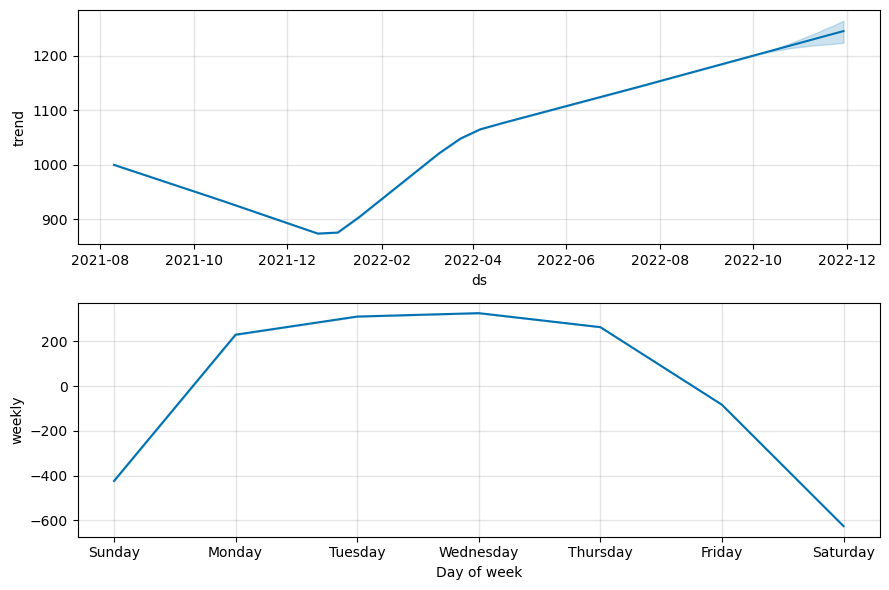

In [27]:
model.plot_components(forecast);

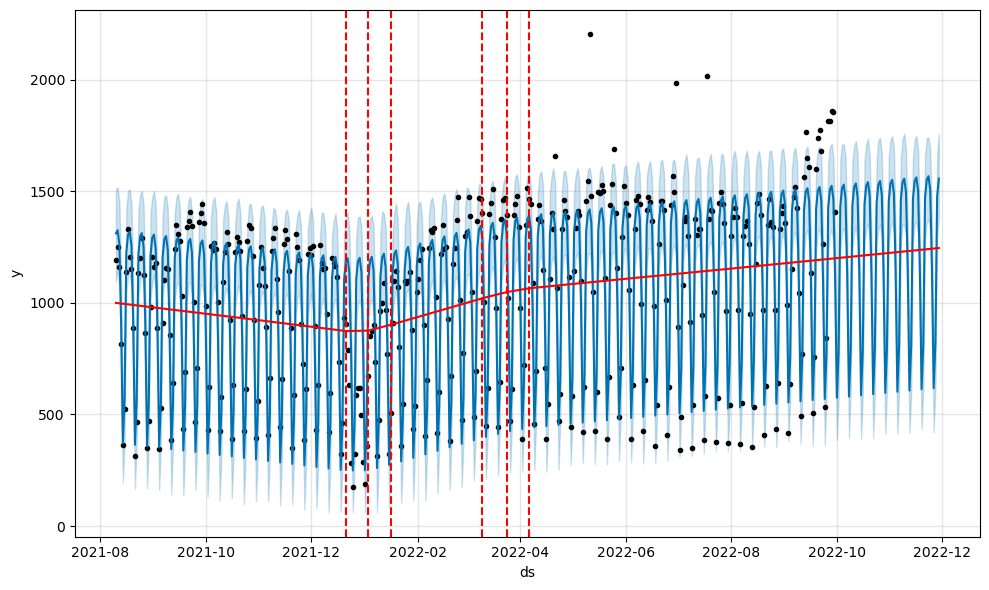

In [28]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(),model, forecast);

In [29]:
model.changepoints

13    2021-08-23
27    2021-09-06
40    2021-09-19
53    2021-10-02
66    2021-10-15
80    2021-10-29
93    2021-11-11
106   2021-11-24
120   2021-12-08
133   2021-12-21
146   2022-01-03
159   2022-01-16
173   2022-01-30
186   2022-02-12
199   2022-02-25
212   2022-03-10
226   2022-03-24
239   2022-04-06
252   2022-04-19
266   2022-05-03
279   2022-05-16
292   2022-05-29
305   2022-06-11
319   2022-06-25
332   2022-07-08
Name: ds, dtype: datetime64[ns]